In [1]:
import torch
import pandas as pd
from lib.churn_prediction import ChurnPrediction

# pd.set_option('mode.chained_assignment', None)

In [2]:
df_all_data = pd.read_csv('D:\data\churn_prediction//Churn_Modelling.csv')
churn_prediction = ChurnPrediction(df_all_data, is_display_detail = False)

ChartVisualizer object created
ChurnPrediction object created


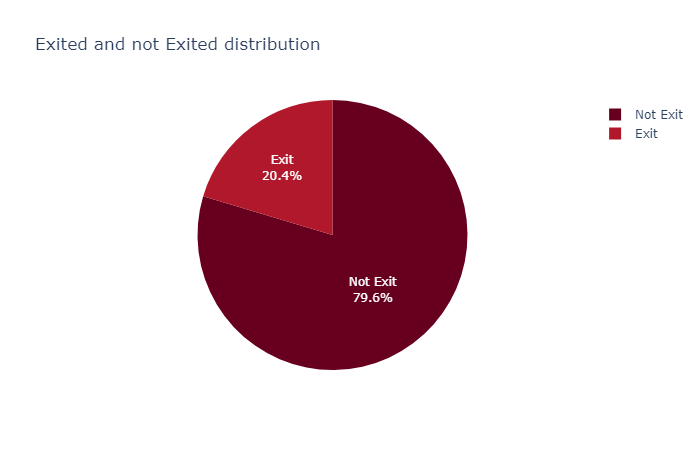

In [3]:
churn_prediction.show_label_distribution()

In [4]:
churn_prediction.show_tuning_combinations()

num of combination: 16


,lr,batch_size,shuffle,class_weight,dropout_percent,list_layers_input_size
0,0.02,1000,True,None,0.4,"[400, 200, 100, 50]"
1,0.02,1000,True,None,0.4,"[100, 50]"
2,0.02,1000,True,"[tensor(0.8000), tensor(1.)]",0.4,"[400, 200, 100, 50]"
3,0.02,1000,True,"[tensor(0.8000), tensor(1.)]",0.4,"[100, 50]"
4,0.02,1000,False,None,0.4,"[400, 200, 100, 50]"
5,0.02,1000,False,None,0.4,"[100, 50]"
6,0.02,1000,False,"[tensor(0.8000), tensor(1.)]",0.4,"[400, 200, 100, 50]"
7,0.02,1000,False,"[tensor(0.8000), tensor(1.)]",0.4,"[100, 50]"
8,0.10,1000,True,None,0.4,"[400, 200, 100, 50]"
9,0.10,1000,True,None,0.4,"[100, 50]"


In [5]:
churn_prediction.cross_validate(num_max_epochs = 300, patience = 15,
                                                is_test_model = True, is_log_in_tsboard = True)

NNModel object created
train and valid model:  _dropout_p_0.4_layers_size_[400,200,100,50]_lr_0.02_no_cw_bs_1000_shuffle_True
ChurnPredictionDataset object created
ChurnPredictionDataset object created
EarlyStopping object created
EarlyStopping counter: 1 out of 15
EarlyStopping counter: 2 out of 15
EarlyStopping counter: 3 out of 15
EarlyStopping counter: 4 out of 15
EarlyStopping counter: 5 out of 15
EarlyStopping counter: 1 out of 15
EarlyStopping counter: 2 out of 15
EarlyStopping counter: 3 out of 15
EarlyStopping counter: 4 out of 15
EarlyStopping counter: 5 out of 15
EarlyStopping counter: 6 out of 15
EarlyStopping counter: 7 out of 15
EarlyStopping counter: 8 out of 15
EarlyStopping counter: 9 out of 15
EarlyStopping counter: 10 out of 15
EarlyStopping counter: 11 out of 15
EarlyStopping counter: 12 out of 15
EarlyStopping counter: 13 out of 15
EarlyStopping counter: 14 out of 15
EarlyStopping counter: 15 out of 15
Early stopping at 33
NNModel object created
train and valid mod

EarlyStopping counter: 15 out of 15
Early stopping at 53
NNModel object created
train and valid model:  _dropout_p_0.4_layers_size_[400,200,100,50]_lr_0.02_cw_0.80_1.00_bs_1000_shuffle_True
ChurnPredictionDataset object created
ChurnPredictionDataset object created
EarlyStopping object created
EarlyStopping counter: 1 out of 15
EarlyStopping counter: 2 out of 15
EarlyStopping counter: 3 out of 15
EarlyStopping counter: 4 out of 15
EarlyStopping counter: 5 out of 15
EarlyStopping counter: 6 out of 15
EarlyStopping counter: 7 out of 15
EarlyStopping counter: 8 out of 15
EarlyStopping counter: 9 out of 15
EarlyStopping counter: 1 out of 15
EarlyStopping counter: 2 out of 15
EarlyStopping counter: 3 out of 15
EarlyStopping counter: 4 out of 15
EarlyStopping counter: 5 out of 15
EarlyStopping counter: 6 out of 15
EarlyStopping counter: 7 out of 15
EarlyStopping counter: 8 out of 15
EarlyStopping counter: 9 out of 15
EarlyStopping counter: 10 out of 15
EarlyStopping counter: 11 out of 15
Ear

EarlyStopping counter: 1 out of 15
EarlyStopping counter: 2 out of 15
EarlyStopping counter: 1 out of 15
EarlyStopping counter: 1 out of 15
EarlyStopping counter: 1 out of 15
EarlyStopping counter: 1 out of 15
EarlyStopping counter: 2 out of 15
EarlyStopping counter: 1 out of 15
EarlyStopping counter: 2 out of 15
EarlyStopping counter: 3 out of 15
EarlyStopping counter: 4 out of 15
EarlyStopping counter: 5 out of 15
EarlyStopping counter: 6 out of 15
EarlyStopping counter: 7 out of 15
EarlyStopping counter: 8 out of 15
EarlyStopping counter: 9 out of 15
EarlyStopping counter: 10 out of 15
EarlyStopping counter: 1 out of 15
EarlyStopping counter: 2 out of 15
EarlyStopping counter: 3 out of 15
EarlyStopping counter: 4 out of 15
EarlyStopping counter: 5 out of 15
EarlyStopping counter: 6 out of 15
EarlyStopping counter: 7 out of 15
EarlyStopping counter: 8 out of 15
EarlyStopping counter: 9 out of 15
EarlyStopping counter: 10 out of 15
EarlyStopping counter: 11 out of 15
EarlyStopping cou

EarlyStopping counter: 3 out of 15
EarlyStopping counter: 4 out of 15
EarlyStopping counter: 5 out of 15
EarlyStopping counter: 6 out of 15
EarlyStopping counter: 7 out of 15
EarlyStopping counter: 8 out of 15
EarlyStopping counter: 9 out of 15
EarlyStopping counter: 10 out of 15
EarlyStopping counter: 11 out of 15
EarlyStopping counter: 12 out of 15
EarlyStopping counter: 13 out of 15
EarlyStopping counter: 14 out of 15
EarlyStopping counter: 15 out of 15
Early stopping at 63
NNModel object created
train and valid model:  _dropout_p_0.4_layers_size_[100,50]_lr_0.02_no_cw_bs_1000_shuffle_False
ChurnPredictionDataset object created
ChurnPredictionDataset object created
EarlyStopping object created
EarlyStopping counter: 1 out of 15
EarlyStopping counter: 2 out of 15
EarlyStopping counter: 3 out of 15
EarlyStopping counter: 1 out of 15
EarlyStopping counter: 1 out of 15
EarlyStopping counter: 1 out of 15
EarlyStopping counter: 2 out of 15
EarlyStopping counter: 3 out of 15
EarlyStopping 

EarlyStopping counter: 3 out of 15
EarlyStopping counter: 4 out of 15
EarlyStopping counter: 5 out of 15
EarlyStopping counter: 6 out of 15
EarlyStopping counter: 7 out of 15
EarlyStopping counter: 8 out of 15
EarlyStopping counter: 9 out of 15
EarlyStopping counter: 10 out of 15
EarlyStopping counter: 11 out of 15
EarlyStopping counter: 12 out of 15
EarlyStopping counter: 13 out of 15
EarlyStopping counter: 14 out of 15
EarlyStopping counter: 15 out of 15
Early stopping at 44
NNModel object created
train and valid model:  _dropout_p_0.4_layers_size_[400,200,100,50]_lr_0.1_no_cw_bs_1000_shuffle_True
ChurnPredictionDataset object created
ChurnPredictionDataset object created
EarlyStopping object created
EarlyStopping counter: 1 out of 15
EarlyStopping counter: 1 out of 15
EarlyStopping counter: 1 out of 15
EarlyStopping counter: 2 out of 15
EarlyStopping counter: 1 out of 15
EarlyStopping counter: 2 out of 15
EarlyStopping counter: 3 out of 15
EarlyStopping counter: 4 out of 15
EarlySto

EarlyStopping counter: 10 out of 15
EarlyStopping counter: 11 out of 15
EarlyStopping counter: 12 out of 15
EarlyStopping counter: 13 out of 15
EarlyStopping counter: 14 out of 15
EarlyStopping counter: 15 out of 15
Early stopping at 36
NNModel object created
train and valid model:  _dropout_p_0.4_layers_size_[400,200,100,50]_lr_0.1_cw_0.80_1.00_bs_1000_shuffle_True
ChurnPredictionDataset object created
ChurnPredictionDataset object created
EarlyStopping object created
EarlyStopping counter: 1 out of 15
EarlyStopping counter: 2 out of 15
EarlyStopping counter: 3 out of 15
EarlyStopping counter: 4 out of 15
EarlyStopping counter: 5 out of 15
EarlyStopping counter: 6 out of 15
EarlyStopping counter: 7 out of 15
EarlyStopping counter: 8 out of 15
EarlyStopping counter: 9 out of 15
EarlyStopping counter: 10 out of 15
EarlyStopping counter: 11 out of 15
EarlyStopping counter: 12 out of 15
EarlyStopping counter: 13 out of 15
EarlyStopping counter: 14 out of 15
EarlyStopping counter: 15 out o

EarlyStopping counter: 12 out of 15
EarlyStopping counter: 13 out of 15
EarlyStopping counter: 14 out of 15
EarlyStopping counter: 15 out of 15
Early stopping at 39
NNModel object created
train and valid model:  _dropout_p_0.4_layers_size_[400,200,100,50]_lr_0.1_no_cw_bs_1000_shuffle_False
ChurnPredictionDataset object created
ChurnPredictionDataset object created
EarlyStopping object created
EarlyStopping counter: 1 out of 15
EarlyStopping counter: 1 out of 15
EarlyStopping counter: 2 out of 15
EarlyStopping counter: 1 out of 15
EarlyStopping counter: 2 out of 15
EarlyStopping counter: 3 out of 15
EarlyStopping counter: 1 out of 15
EarlyStopping counter: 2 out of 15
EarlyStopping counter: 3 out of 15
EarlyStopping counter: 4 out of 15
EarlyStopping counter: 5 out of 15
EarlyStopping counter: 6 out of 15
EarlyStopping counter: 7 out of 15
EarlyStopping counter: 8 out of 15
EarlyStopping counter: 9 out of 15
EarlyStopping counter: 1 out of 15
EarlyStopping counter: 2 out of 15
EarlyStop

EarlyStopping counter: 1 out of 15
EarlyStopping counter: 2 out of 15
EarlyStopping counter: 1 out of 15
EarlyStopping counter: 2 out of 15
EarlyStopping counter: 1 out of 15
EarlyStopping counter: 2 out of 15
EarlyStopping counter: 3 out of 15
EarlyStopping counter: 4 out of 15
EarlyStopping counter: 5 out of 15
EarlyStopping counter: 6 out of 15
EarlyStopping counter: 7 out of 15
EarlyStopping counter: 8 out of 15
EarlyStopping counter: 1 out of 15
EarlyStopping counter: 2 out of 15
EarlyStopping counter: 3 out of 15
EarlyStopping counter: 4 out of 15
EarlyStopping counter: 1 out of 15
EarlyStopping counter: 2 out of 15
EarlyStopping counter: 3 out of 15
EarlyStopping counter: 4 out of 15
EarlyStopping counter: 5 out of 15
EarlyStopping counter: 6 out of 15
EarlyStopping counter: 7 out of 15
EarlyStopping counter: 8 out of 15
EarlyStopping counter: 9 out of 15
EarlyStopping counter: 10 out of 15
EarlyStopping counter: 11 out of 15
EarlyStopping counter: 12 out of 15
EarlyStopping cou

EarlyStopping counter: 15 out of 15
Early stopping at 51

All model is trained successfully


In [6]:
churn_prediction.test_model(dataset = 'test_set')
churn_prediction.show_classification_report(dataset = 'test_set')

ChurnPredictionDataset object created
Classification report:


,precision,recall,f1-score,support
0.0,0.872554,0.979912,0.923122,1593.00
1.0,0.848341,0.439803,0.579288,407.00
accuracy,0.870000,0.870000,0.870000,0.87
macro avg,0.860448,0.709858,0.751205,2000.00
weighted avg,0.867627,0.870000,0.853152,2000.00


In [8]:
churn_prediction.test_model(dataset = 'train_set')
churn_prediction.show_classification_report(dataset = 'train_set')

Classification report:


,precision,recall,f1-score,support
0.0,0.873919,0.975983,0.922136,4247.000000
1.0,0.827411,0.449862,0.582837,1087.000000
accuracy,0.868766,0.868766,0.868766,0.868766
macro avg,0.850665,0.712923,0.752486,5334.000000
weighted avg,0.864442,0.868766,0.852991,5334.000000


In [9]:
churn_prediction.df_cv_performance

,lr,batch_size,shuffle,class_weight,dropout_percent,list_layers_input_size,model_best_avg_loss,model_idx,best_cv_number_idx
0,0.02,1000,True,None,0.4,"[400, 200, 100, 50]",0.337628,0,2
1,0.02,1000,True,None,0.4,"[100, 50]",0.337802,1,2
2,0.02,1000,True,"[tensor(0.8000), tensor(1.)]",0.4,"[400, 200, 100, 50]",0.370450,2,2
3,0.02,1000,True,"[tensor(0.8000), tensor(1.)]",0.4,"[100, 50]",0.368935,3,2
4,0.02,1000,False,None,0.4,"[400, 200, 100, 50]",0.342478,4,2
5,0.02,1000,False,None,0.4,"[100, 50]",0.340431,5,2
6,0.02,1000,False,"[tensor(0.8000), tensor(1.)]",0.4,"[400, 200, 100, 50]",0.373524,6,2
7,0.02,1000,False,"[tensor(0.8000), tensor(1.)]",0.4,"[100, 50]",0.369518,7,2
8,0.10,1000,True,None,0.4,"[400, 200, 100, 50]",0.338023,8,2
9,0.10,1000,True,None,0.4,"[100, 50]",0.338591,9,2
